# <center> Python画图代码 </center>

# 1.连续性图

In [ ]:
import sys  # sys模块提供了一系列有关Python运行环境的变量和函数。
from pylab import *
#pylab是matplotlib的一个子包，非常适合于进行交互式绘图
t = arange(-60.0, 60.3, 0.1)
s = 1/(1 + exp(-t))
ax = subplot(211)
ax.plot(t,s)
ax.axis([-5,5,0,1])   #x轴的标度
plt.xlabel('x')
plt.ylabel('Sigmoid(x)')

ax = subplot(212)
ax.plot(t,s)
ax.axis([-60,60,0,1])
plt.xlabel('x')
plt.ylabel('Sigmoid(x)')
show()

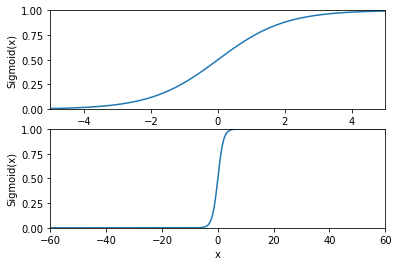

In [2]:
import sys
from pylab import *

t = arange(-60.0, 60.3, 0.1)
s = 1/(1 + exp(-t))
ax = subplot(211)
ax.plot(t,s)
ax.axis([-5,5,0,1])
plt.xlabel('x')
plt.ylabel('Sigmoid(x)')

ax = subplot(212)
ax.plot(t,s)
ax.axis([-60,60,0,1])
plt.xlabel('x')
plt.ylabel('Sigmoid(x)')
show()

# 2.plot2D.py

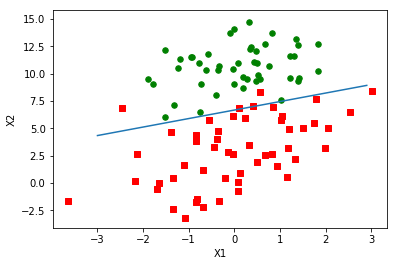

In [3]:
'''
Created on Oct 6, 2010

@author: Peter
'''
from numpy import *
import matplotlib
import matplotlib.pyplot as plt 
from matplotlib.patches import Rectangle
import logRegres

dataMat,labelMat=logRegres.loadDataSet()
dataArr = array(dataMat)
weights = logRegres.stocGradAscent0(dataArr,labelMat)

n = shape(dataArr)[0] #number of points to create
xcord1 = []; ycord1 = []
xcord2 = []; ycord2 = []

markers =[]
colors =[]
for i in range(n):
    if int(labelMat[i])== 1:
        xcord1.append(dataArr[i,1]); ycord1.append(dataArr[i,2])
    else:
        xcord2.append(dataArr[i,1]); ycord2.append(dataArr[i,2])

fig = plt.figure()
ax = fig.add_subplot(111)
#ax.scatter(xcord,ycord, c=colors, s=markers)
type1 = ax.scatter(xcord1, ycord1, s=30, c='red', marker='s')
type2 = ax.scatter(xcord2, ycord2, s=30, c='green')
x = arange(-3.0, 3.0, 0.1)
#weights = [-2.9, 0.72, 1.29]
#weights = [-5, 1.09, 1.42]
weights = [13.03822793,   1.32877317,  -1.96702074]
weights = [4.12,   0.48,  -0.6168]
y = (-weights[0]-weights[1]*x)/weights[2]
type3 = ax.plot(x, y)
#ax.legend([type1, type2, type3], ["Did Not Like", "Liked in Small Doses", "Liked in Large Doses"], loc=2)
#ax.axis([-5000,100000,-2,25])
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

# 3.PlotGD.py

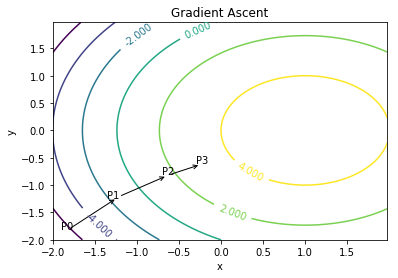

In [4]:
'''
Created on Oct 28, 2010

@author: Peter
'''
import matplotlib
import numpy as np
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

leafNode = dict(boxstyle="round4", fc="0.8")
arrow_args = dict(arrowstyle="<-")

matplotlib.rcParams['xtick.direction'] = 'out'
matplotlib.rcParams['ytick.direction'] = 'out'

delta = 0.025
x = np.arange(-2.0, 2.0, delta)
y = np.arange(-2.0, 2.0, delta)
X, Y = np.meshgrid(x, y)
Z1 = -((X-1)**2)
Z2 = -(Y**2)
#Z1 = mlab.bivariate_normal(X, Y, 1.0, 1.0, 0.0, 0.0)
#Z2 = mlab.bivariate_normal(X, Y, 1.5, 0.5, 1, 1)
# difference of Gaussians
Z = 1.0 * (Z2 + Z1)+5.0

# Create a simple contour plot with labels using default colors.  The
# inline argument to clabel will control whether the labels are draw
# over the line segments of the contour, removing the lines beneath
# the label
plt.figure()
CS = plt.contour(X, Y, Z)
plt.annotate('', xy=(0.05, 0.05),  xycoords='axes fraction',
             xytext=(0.2,0.2), textcoords='axes fraction',
             va="center", ha="center", bbox=leafNode, arrowprops=arrow_args )
plt.text(-1.9, -1.8, 'P0')
plt.annotate('', xy=(0.2,0.2),  xycoords='axes fraction',
             xytext=(0.35,0.3), textcoords='axes fraction',
             va="center", ha="center", bbox=leafNode, arrowprops=arrow_args )
plt.text(-1.35, -1.23, 'P1')
plt.annotate('', xy=(0.35,0.3),  xycoords='axes fraction',
             xytext=(0.45,0.35), textcoords='axes fraction',
             va="center", ha="center", bbox=leafNode, arrowprops=arrow_args )
plt.text(-0.7, -0.8, 'P2')
plt.text(-0.3, -0.6, 'P3')
plt.clabel(CS, inline=1, fontsize=10)
plt.title('Gradient Ascent')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# 4.plotSDerror.py 参数对比图

一共涉及到三个参数x0，x1，x2 可以和明显的看出x0收敛快（在迭代次数到达50次的时候），x1，x2收敛慢。

## 代码注释

In [15]:
'''
Created on Oct 6, 2010

@author: Peter
'''
from numpy import *
import matplotlib
import matplotlib.pyplot as plt  #画曲线图
from matplotlib.patches import Rectangle  #生成图形的接口

#为Python提供一个数据绘图包。matplotlib是受MATLAB的启发构建的。
#matplotlib有一套完全仿照MATLAB的函数形式的绘图接口，在matplotlib.pyplot模块中。
#旨在为python提供绘图接口


def stocGradAscent0(dataMatrix, classLabels):
    m,n = shape(dataMatrix)
    alpha = 0.5
    weights = ones(n)   #initialize to all ones
    weightsHistory=zeros((500*m,n))
    for j in range(500):
        for i in range(m):
            h = logRegres.sigmoid(sum(dataMatrix[i]*weights))
            error = classLabels[i] - h
            weights = weights + alpha * error * dataMatrix[i]
            weightsHistory[j*m + i,:] = weights
    return weightsHistory

def stocGradAscent1(dataMatrix, classLabels):
    m,n = shape(dataMatrix)
    alpha = 0.4
    weights = ones(n)   #initialize to all ones
    weightsHistory=zeros((40*m,n))
    for j in range(40):
        dataIndex = range(m)
        for i in range(m):
            alpha = 4/(1.0+j+i)+0.01
            randIndex = int(random.uniform(0,len(dataIndex)))
            h = logRegres.sigmoid(sum(dataMatrix[randIndex]*weights))
            error = classLabels[randIndex] - h
            #print error
            weights = weights + alpha * error * dataMatrix[randIndex]
            weightsHistory[j*m + i,:] = weights
            del(dataIndex[randIndex])
    print (weights)
    return weightsHistory
    

dataMat,labelMat=loadDataSet()
dataArr = array(dataMat)
myHist = stocGradAscent1(dataArr,labelMat)


n = shape(dataArr)[0] #number of points to create
xcord1 = []; ycord1 = []
xcord2 = []; ycord2 = []

markers =[]
colors =[]


fig = plt.figure()
ax = fig.add_subplot(311)
type1 = ax.plot(myHist[:,0])
plt.ylabel('X0')
ax = fig.add_subplot(312)
type1 = ax.plot(myHist[:,1])
plt.ylabel('X1')
ax = fig.add_subplot(313)
type1 = ax.plot(myHist[:,2])
plt.xlabel('iteration')
plt.ylabel('X2')
plt.show()

TabError: inconsistent use of tabs and spaces in indentation (logRegres.py, line 71)

## 代码实现

[ 12.99309915   1.03164026  -1.96131041]


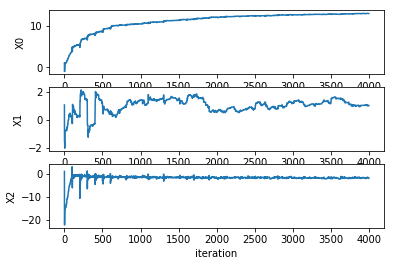

In [5]:
'''
Created on Oct 6, 2010

@author: Peter
'''
from numpy import *
import matplotlib
import matplotlib.pyplot as plt  
from matplotlib.patches import Rectangle
import logRegres

def stocGradAscent0(dataMatrix, classLabels):
    m,n = shape(dataMatrix)
    alpha = 0.5
    weights = ones(n)   #initialize to all ones
    weightsHistory=zeros((500*m,n))
    for j in range(500):
        for i in range(m):
            h = logRegres.sigmoid(sum(dataMatrix[i]*weights))
            error = classLabels[i] - h
            weights = weights + alpha * error * dataMatrix[i]
            weightsHistory[j*m + i,:] = weights
    return weightsHistory

def stocGradAscent1(dataMatrix, classLabels):
    m,n = shape(dataMatrix)
    alpha = 0.4
    weights = ones(n)   #initialize to all ones
    weightsHistory=zeros((40*m,n))
    for j in range(40):
        dataIndex = range(m)
        for i in range(m):
            alpha = 4/(1.0+j+i)+0.01
            randIndex = int(random.uniform(0,len(dataIndex)))
            h = logRegres.sigmoid(sum(dataMatrix[randIndex]*weights))
            error = classLabels[randIndex] - h
            #print error
            weights = weights + alpha * error * dataMatrix[randIndex]
            weightsHistory[j*m + i,:] = weights
            del(dataIndex[randIndex])
    print (weights)
    return weightsHistory
    

dataMat,labelMat=logRegres.loadDataSet()
dataArr = array(dataMat)
myHist = stocGradAscent1(dataArr,labelMat)


n = shape(dataArr)[0] #number of points to create
xcord1 = []; ycord1 = []
xcord2 = []; ycord2 = []

markers =[]
colors =[]


fig = plt.figure()
ax = fig.add_subplot(311)
type1 = ax.plot(myHist[:,0])
plt.ylabel('X0')
ax = fig.add_subplot(312)
type1 = ax.plot(myHist[:,1])
plt.ylabel('X1')
ax = fig.add_subplot(313)
type1 = ax.plot(myHist[:,2])
plt.xlabel('iteration')
plt.ylabel('X2')
plt.show()

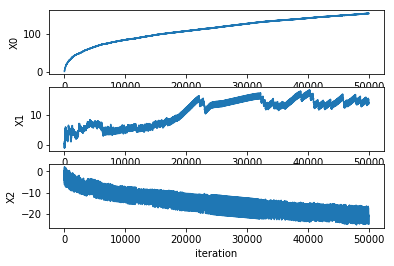

In [6]:
'''
Created on Oct 6, 2010

@author: Peter
'''
from numpy import *
import matplotlib
import matplotlib.pyplot as plt  
from matplotlib.patches import Rectangle
import logRegres

def stocGradAscent0(dataMatrix, classLabels):
    m,n = shape(dataMatrix)
    alpha = 0.5
    weights = ones(n)   #initialize to all ones
    weightsHistory=zeros((500*m,n))
    for j in range(500):
        for i in range(m):
            h = logRegres.sigmoid(sum(dataMatrix[i]*weights))
            error = classLabels[i] - h
            weights = weights + alpha * error * dataMatrix[i]
            weightsHistory[j*m + i,:] = weights
    return weightsHistory

def stocGradAscent1(dataMatrix, classLabels):
    m,n = shape(dataMatrix)
    alpha = 0.4
    weights = ones(n)   #initialize to all ones
    weightsHistory=zeros((40*m,n))
    for j in range(40):
        dataIndex = range(m)
        for i in range(m):
            alpha = 4/(1.0+j+i)+0.01
            randIndex = int(random.uniform(0,len(dataIndex)))
            h = logRegres.sigmoid(sum(dataMatrix[randIndex]*weights))
            error = classLabels[randIndex] - h
            #print error
            weights = weights + alpha * error * dataMatrix[randIndex]
            weightsHistory[j*m + i,:] = weights
            del(dataIndex[randIndex])
    print (weights)
    return weightsHistory
    

dataMat,labelMat=logRegres.loadDataSet()
dataArr = array(dataMat)
myHist = stocGradAscent0(dataArr,labelMat)


n = shape(dataArr)[0] #number of points to create
xcord1 = []; ycord1 = []
xcord2 = []; ycord2 = []

markers =[]
colors =[]


fig = plt.figure()
ax = fig.add_subplot(311)
type1 = ax.plot(myHist[:,0])
plt.ylabel('X0')
ax = fig.add_subplot(312)
type1 = ax.plot(myHist[:,1])
plt.ylabel('X1')
ax = fig.add_subplot(313)
type1 = ax.plot(myHist[:,2])
plt.xlabel('iteration')
plt.ylabel('X2')
plt.show()

In [6]:
import numpy as np
import matplotlib.pyplot as plt
def loadDataSet():
    # 创建数据列表
    dataMat = []
    # 创建标签列表
    labelMat = []
    # 打开文件
    fr = open('testSet.txt')
    # 逐行读取
    for line in fr.readlines():
        # 去掉每行两边的空白字符，并以空格分隔每行数据元素
        lineArr = line.strip().split()
        # 添加数据
        dataMat.append([1.0, float(lineArr[0]), float(lineArr[1])])
        # 添加标签
        labelMat.append(int(lineArr[2]))
    # 关闭文件
    fr.close()
    # 返回
    return dataMat, labelMat

def plotBestFit(weights):
    # 加载数据集
    dataMat, labelMat = loadDataSet()
    # 转换成numpy的array数组
    dataArr = np.array(dataMat)
    # 数据个数
    # 例如建立一个4*2的矩阵c，c.shape[1]为第一维的长度2， c.shape[0]为第二维的长度4
    n = np.shape(dataMat)[0]
    # 正样本
    xcord1 = []
    ycord1 = []
    # 负样本
    xcord2 = []
    ycord2 = []
    # 根据数据集标签进行分类
    for i in range(n):
        if int(labelMat[i]) == 1:
            # 1为正样本
            xcord1.append(dataArr[i, 1])
            ycord1.append(dataArr[i, 2])
        else:
            # 0为负样本
            xcord2.append(dataArr[i, 1])
            ycord2.append(dataArr[i, 2])
    # 新建图框
    fig = plt.figure()
    # 添加subplot
    ax = fig.add_subplot(111)
    # 绘制正样本
    ax.scatter(xcord1, ycord1, s=20, c='red', marker='s', alpha=.5)
    # 绘制负样本
    ax.scatter(xcord2, ycord2, s=20, c='green', alpha=.5)
    # x轴坐标
    x = np.arange(-3.0, 3.0, 0.1)
    # w0*x0 + w1*x1 * w2*x2 = 0
    # x0 = 1, x1 = x, x2 = y
    y = (-weights[0] - weights[1] * x) / weights[2]
    ax.plot(x, y)
    # 绘制title
    plt.title('BestFit')
    # 绘制label
    plt.xlabel('x1')
    plt.ylabel('y2')
    # 显示
    plt.show()
    
import Logistic
dataMat, labelMat = loadDataSet()
# 梯度上升法
weights2, weights_array2 = Logistic.gradAscent(dataMat, labelMat)
plotBestFit(weights2)
print(Logistic.gradAscent(dataMat, labelMat))

(array([[12.78439309],
       [ 1.11820761],
       [-1.7408268 ]]), array([[ 0.63585747,  0.8285296 , -4.11716754],
       [ 1.06011641,  0.92596199, -2.3993654 ],
       [ 1.47267567,  1.01357214, -0.69781584],
       ...,
       [12.78192439,  1.11803571, -1.74049953],
       [12.78315922,  1.11812169, -1.74066323],
       [12.78439309,  1.11820761, -1.7408268 ]]))


In [13]:
weights0 = Logistic.stocGradAscent0(np.array(dataMat), labelMat)
plotBestFit(weights0)

In [11]:
# 改进的随机梯度上升法
weights1, weights_array1 = Logistic.stocGradAscent1(np.array(dataMat), labelMat)
plotBestFit(weights1)
print(weights_array1)

[[ -3.00999598  -3.9116957  -45.46526698]
 [ -0.99999598  -4.80750848 -38.83768795]
 [ -0.99999598  -4.80750848 -38.83768795]
 ...
 [ 15.51464374   1.04898712  -2.22336436]
 [ 15.515284     1.04809355  -2.22037911]
 [ 15.515284     1.04809355  -2.22037916]]
